# Using GeoPandas and MPLLeaflet to render maps

This example will demonstrate using GeoPandas to load and plot some polygons representing the New York City boroughs. Then we'll put it into a Leaflet map right in the notebook using mplleaflet.

## Installation

```
conda install -c conda-forge geopandas
conda install -c conda-forge mplleaflet
```
It is better to install all the dependencies using the main conda channel first, before installing the above packages
from conda-forge.


In [ ]:
!conda install -c conda-forge geopandas
!conda install -c conda-forge mplleaflet


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                                                                /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - alabaster -> python[version='2.7.*|3.5.*|3.6.*|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.6,<3.7.0a0|3.4.*|>=3.7,<3.8.0a0']
  - anaconda-navigator -> python[version='2.7.*|3.5.*|3.6.*|3.4.*']
  - anaconda-project -> python[version='2.7.*|3.5.*|3.6.*|>=3.5,<3.6.0a0|>=3.7,

astropy -> python[version='>=3.7,<3.8.0a0'] -> openssl[version='1.0.*|>=1.0.2o,<1.0.3a|>=1.0.2p,<1.0.3a|>=1.1.1a,<1.1.2a|>=1.1.1e,<1.1.2a|>=1.1.1g,<1.1.2a|>=1.1.1h,<1.1.2a|>=1.1.1d,<1.1.2a|>=1.1.1c,<1.1.2a|>=1.1.1b,<1.1.2a|>=1.1.1i,<1.1.2a|>=1.1.1f,<1.1.2a|>=1.0.2n,<1.0.3a|>=1.0.2m,<1.0.3a|>=1.0.2l,<1.0.3a']
python-libarchive-c -> libarchive -> openssl[version='1.0.*|>=1.0.2o,<1.0.3a|>=1.0.2p,<1.0.3a|>=1.1.1a,<1.1.2a|>=1.1.1f,<1.1.2a|>=1.1.1g,<1.1.2a|>=1.1.1h,<1.1.2a|>=1.1.1i,<1.1.2a|>=1.0.2m,<1.0.3a|>=1.0.2l,<1.0.3a|>=1.1.1d,<1.1.2a|>=1.1.1e,<1.1.2a|>=1.1.1c,<1.1.2a|>=1.0.2n,<1.0.3a|>=1.1.1b,<1.1.2a']
pydocstyle -> python[version='>=3.5'] -> openssl[version='1.0.*|>=1.0.2o,<1.0.3a|>=1.0.2p,<1.0.3a|>=1.1.1a,<1.1.2a|>=1.1.1d,<1.1.2a|>=1.1.1e,<1.1.2a|>=1.1.1f,<1.1.2a|>=1.1.1g,<1.1.2a|>=1.1.1h,<1.1.2a|>=1.1.1i,<1.1.2a|>=1.1.1c,<1.1.2a|>=1.1.1b,<1.1.2a|>=1.0.2n,<1.0.3a|>=1.0.2m,<1.0.3a|>=1.0.2l,<1.0.3a']
ply -> python -> openssl[version='1.0.*|>=1.0.2o,<1.0.3a|>=1.0.2p,<1.0.3a|>=1.1.1a,<1.

numba -> numpy[version='>=1.16.5,<2.0a0'] -> numpy-base[version='1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.11.3|1.14.3|1.14.3|1.14.3|1.14.3|1.14.3|1.14.3|1.14.4|1.14.4|1.14.4|1.14.4|1.14.4|1.14.4|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.5|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.14.6|1.15.0|1.15.0|1.15.0|1.15.0|1.15.0|1.15.0|1.15.0|1.15.0|1.15.1|1.15.1|1.15.1|1.15.1|1.15.1|1.15.1|1.15.1|1.15.1|1.15.1|1.15.1|1.15

Solving environment: done

## Package Plan ##

  environment location: /home/iiitmk/anaconda3

  added / updated specs:
    - mplleaflet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h578d9bd_0         3.0 MB  conda-forge
    mplleaflet-0.0.5           |             py_4          25 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  mplleaflet         conda-forge/noarch::mplleaflet-0.0.5-py_4
  python_abi         conda-forge/linux-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38h06a4308_0 --> conda-forge::conda-4.9.2-py38h578d9bd_0

In [2]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt

import mplleaflet

%matplotlib inline


The following data is downloaded from [data.melbourne.vic.gov.au](https://data.melbourne.vic.gov.au/Property-Planning/Municipal-boundary/ck33-yh8z).

In [3]:
df = gpd.read_file('/home/iiitmk/Desktop/GIS_repo/Municipal boundary/geo_export_d0837bd2-18e9-4f70-9de8-98967ffa2596.shp')

ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.

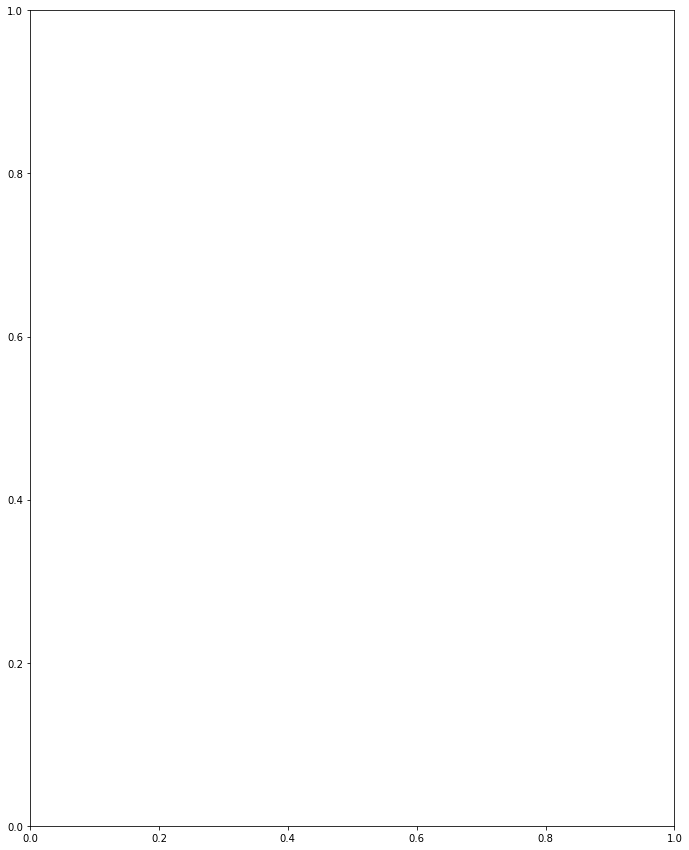

In [4]:
ax = df.plot(figsize=(15,15))

In [15]:
# The display call inserts the html in the IPython notebook.
# An interactive, panable, zoomable map.
mplleaflet.display(fig=ax.figure, crs=df.crs)